##### Import necessary library!

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [78]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [79]:
tf.test.is_built_with_cuda()

True

In [80]:
tf.__version__

'2.8.0'

In [81]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [82]:
x_train.shape

(50000, 32, 32, 3)

In [83]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [84]:
y_train.shape

(50000, 1)

In [85]:
# here there will be 10 number , 0-9 means 10 classes
y_train[0:4]

array([[6],
       [9],
       [9],
       [4]], dtype=uint8)

### Showing the classes

# Data visualization!

In [86]:
#imshow is image show function
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

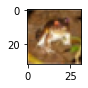

In [87]:
plot_sample(0)

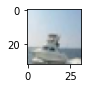

In [88]:
plot_sample(100)

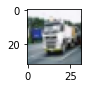

In [89]:
plot_sample(1000)

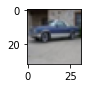

In [90]:
plot_sample(10000)

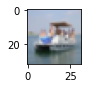

In [91]:
plot_sample(49000)

In [92]:
classes = ["airplane", "automobile", "bird","cat", "deer","dog","frog","horse","ship","truck"]

In [93]:
y_train[49000]

array([8], dtype=uint8)

In [94]:
classes[y_train[49000][0]]

'ship'

## Data scaling for better accuracy and train

In [95]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [96]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [97]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## One Hot Encoding

In [110]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype = 'float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [111]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype = 'float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

#  neural network
#first layer input layer
#second layer dense layer

In [69]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_scaled, y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 186s 97ms/step - loss: 1.8116 - accuracy: 0.3552
Epoch 2/50
1563/1563 [==============================] - 132s 84ms/step - loss: 1.6249 - accuracy: 0.4253
Epoch 3/50
1563/1563 [==============================] - 208s 133ms/step - loss: 1.5435 - accuracy: 0.4557
Epoch 4/50
1563/1563 [==============================] - 154s 99ms/step - loss: 1.4827 - accuracy: 0.4784
Epoch 5/50
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4354 - accuracy: 0.4970
Epoch 6/50
1563/1563 [==============================] - 134s 86ms/step - loss: 1.3909 - accuracy: 0.5118
Epoch 7/50
1563/1563 [==============================] - 194s 124ms/step - loss: 1.3515 - accuracy: 0.5251
Epoch 8/50
1563/1563 [==============================] - 221s 141ms/step - loss: 1.3175 - accuracy: 0.5386
Epoch 9/50
1563/1563 [==============================] - 213s 136ms/step - loss: 1.2839 - accuracy: 0.5498
Epoch 10/50
1563/1563 [============================

## Prediction

In [113]:
#The higher prediction number will be our answer!
model.predict(x_test_scaled)

array([[3.12945843e-01, 8.21869254e-01, 8.74778152e-01, ...,
        1.61531916e-05, 5.27581275e-01, 1.55914545e-01],
       [8.00813198e-01, 9.94127512e-01, 6.50255561e-01, ...,
        1.63880348e-01, 9.97542560e-01, 9.91727948e-01],
       [9.99293208e-01, 9.45932567e-01, 8.04684997e-01, ...,
        8.18639874e-01, 9.72192764e-01, 9.56836820e-01],
       ...,
       [1.03955686e-01, 3.15982103e-03, 9.95700717e-01, ...,
        6.01734579e-01, 1.34649903e-01, 2.01881915e-01],
       [2.83538878e-01, 3.02793980e-01, 9.56141710e-01, ...,
        1.29523128e-01, 9.28567946e-02, 1.97363794e-02],
       [8.00969005e-02, 4.39912379e-02, 9.51244533e-01, ...,
        9.94706154e-01, 9.54476595e-02, 2.58371651e-01]], dtype=float32)

In [114]:
# argmax will give us the max prediction number!
np.argmax(model.predict(x_test_scaled)[0])

3

## Now crossmatch the prediction

In [101]:
classes[np.argmax(model.predict(x_test_scaled)[0])]

'cat'

In [102]:
classes[y_test[0][0]]

'cat'

In [103]:
np.argmax(model.predict(x_test_scaled)[1])

8

In [104]:
classes[np.argmax(model.predict(x_test_scaled)[1])]

'ship'

In [105]:
classes[y_test[1][0]]

'ship'

### Check Model Accuracy

In [112]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 55s 44ms/step - loss: 1.7071 - accuracy: 0.5413


[1.7071325778961182, 0.5412999987602234]